# **Data Visualization**

Mohammad Mahdi Razmjoo - 400101272

# Load the Iris dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.datasets import load_iris

iris_sklearn = load_iris()
iris = pd.DataFrame(data= np.c_[iris_sklearn['data'], iris_sklearn['target']],
                    columns= iris_sklearn['feature_names'] + ['species'])
iris['species'] = iris['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

print(iris.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


# 1. Pie Chart: Distribution of Iris Species

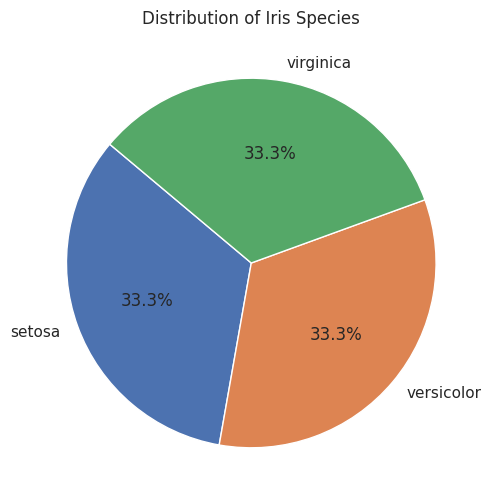

In [ ]:
species_counts = iris['species'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(species_counts, labels=species_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Iris Species')
plt.show()

# Explanation:
# The pie chart above illustrates the proportion of each iris species in the dataset.
# Each slice represents one species, and the percentage indicates its relative frequency.

# 2. Box Plot: Sepal Length Distribution by Species

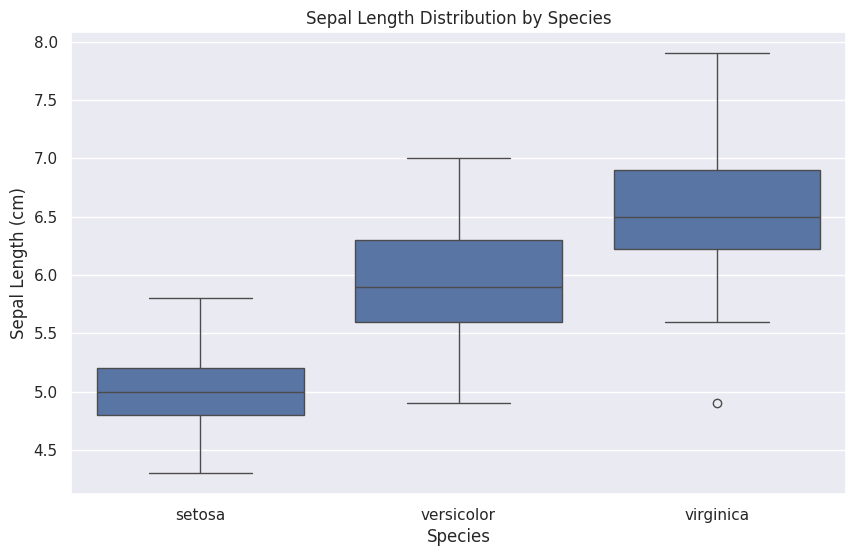

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='sepal length (cm)', data=iris)
plt.title('Sepal Length Distribution by Species')
plt.xlabel('Species')
plt.ylabel('Sepal Length (cm)')
plt.show()

# Explanation:
# The box plot displays the distribution of sepal lengths for each species.
# The boxes represent the interquartile range (IQR), the line inside each box indicates the median,
# and the whiskers extend to 1.5 times the IQR. Outliers are shown as individual points.

# 3. Line Chart: Average Measurements per Species

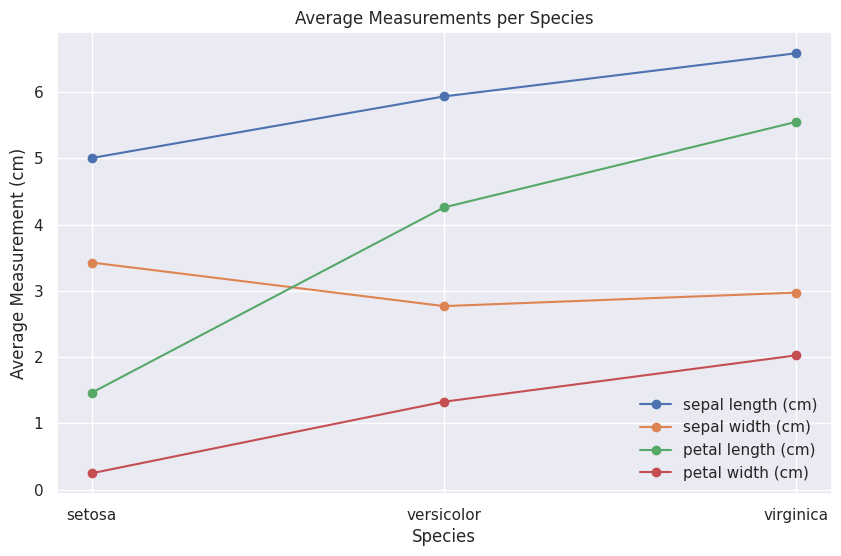

In [ ]:
species_means = iris.groupby('species').mean()
plt.figure(figsize=(10, 6))
for column in species_means.columns:
    plt.plot(species_means.index, species_means[column], marker='o', label=column)
plt.title('Average Measurements per Species')
plt.xlabel('Species')
plt.ylabel('Average Measurement (cm)')
plt.legend()
plt.show()

# Explanation:
# The line chart shows the average measurements (sepal length, sepal width, petal length, petal width)
# for each species. Each line represents a measurement type, and points indicate average values for each species.

# 4. Stacked Line Chart: Cumulative Sum of Measurements

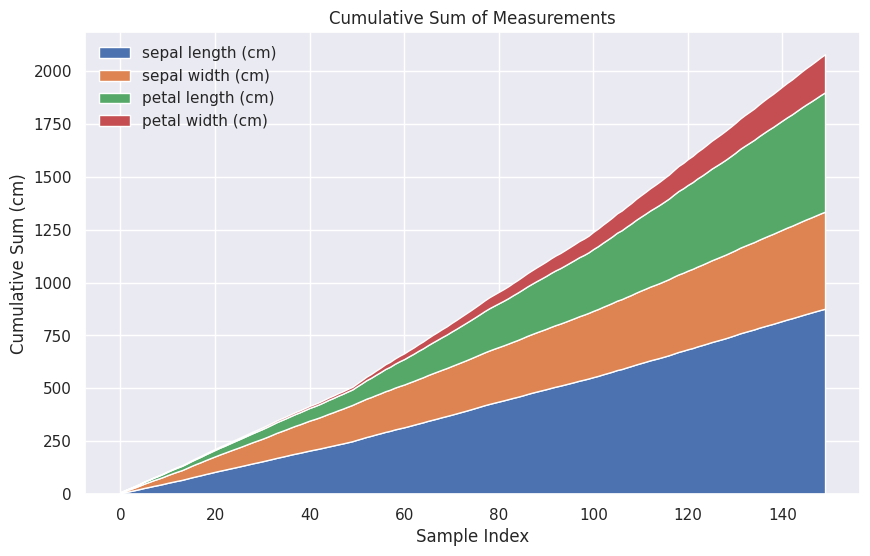

In [ ]:
cumulative_sums = iris.drop(columns='species').cumsum()
plt.figure(figsize=(10, 6))
plt.stackplot(range(len(cumulative_sums)), cumulative_sums.T, labels=cumulative_sums.columns)
plt.title('Cumulative Sum of Measurements')
plt.xlabel('Sample Index')
plt.ylabel('Cumulative Sum (cm)')
plt.legend(loc='upper left')
plt.show()

# Explanation:
# The stacked line chart depicts the cumulative sum of each measurement across all samples.
# It provides insight into the accumulation of measurements as we progress through the dataset.

# 5. Bar Chart: Average Sepal Length by Species

<ipython-input-58-034341c50e5d>:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




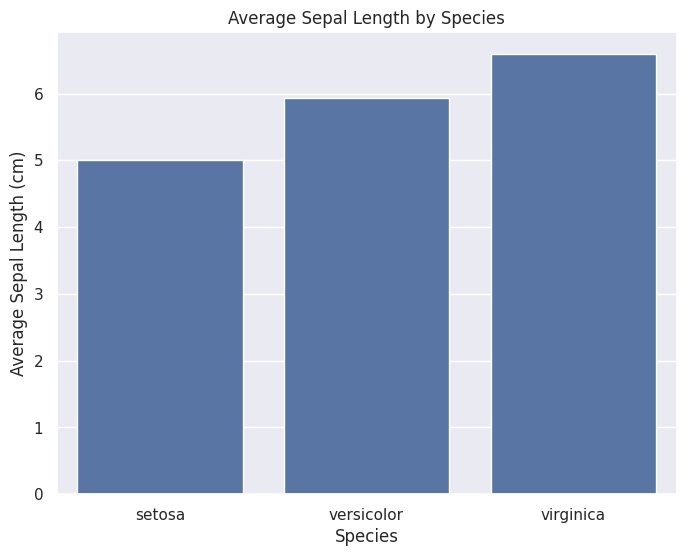

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='species', y='sepal length (cm)', data=iris, ci=None)
plt.title('Average Sepal Length by Species')
plt.xlabel('Species')
plt.ylabel('Average Sepal Length (cm)')
plt.show()

# Explanation:
# The bar chart presents the average sepal length for each species.
# It allows for easy comparison of sepal lengths among the species.

# 6. Multiple Bar Chart: Average Measurements by Species

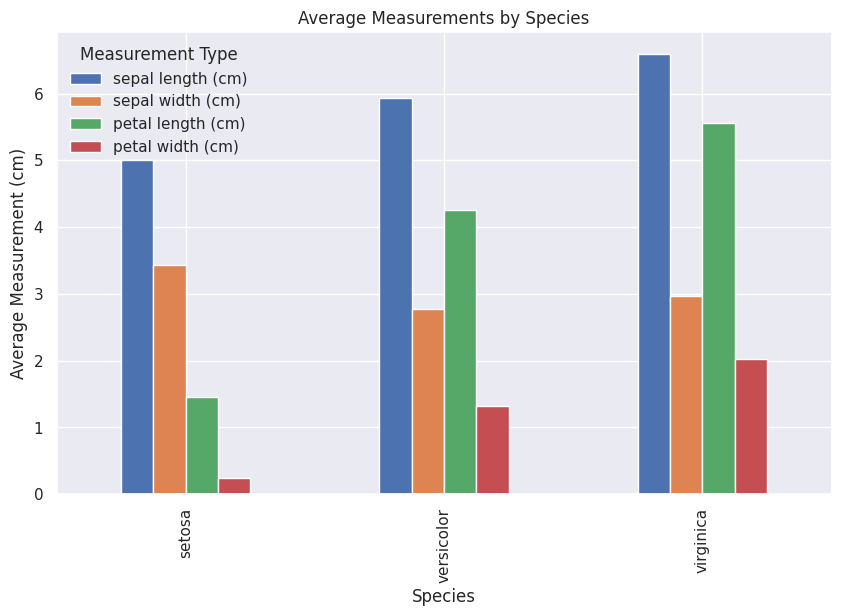

In [ ]:
species_means = iris.groupby('species').mean()
species_means.plot(kind='bar', figsize=(10, 6))
plt.title('Average Measurements by Species')
plt.xlabel('Species')
plt.ylabel('Average Measurement (cm)')
plt.legend(title='Measurement Type')
plt.show()

# Explanation:
# The multiple bar chart displays the average values of all measurements for each species.
# Each group of bars corresponds to a species, with different colors representing measurement types.

# 7. Stacked Bar Chart: Measurement Sums by Species

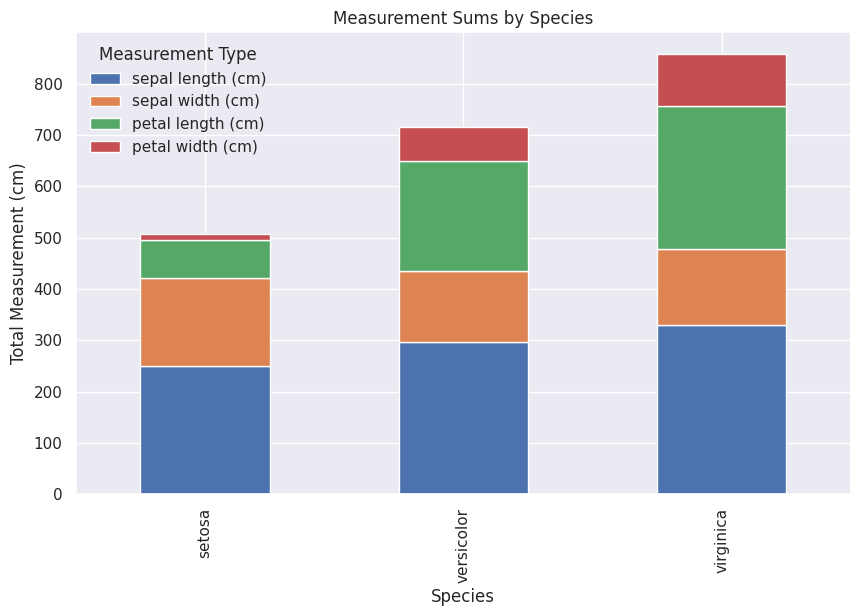

In [ ]:
species_sums = iris.groupby('species').sum()
species_sums.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Measurement Sums by Species')
plt.xlabel('Species')
plt.ylabel('Total Measurement (cm)')
plt.legend(title='Measurement Type')
plt.show()

# Explanation:
# The stacked bar chart illustrates the total sum of each measurement type for each species.
# The stacked segments show the contribution of each measurement to the total per species.

# 8. Scatter Plot: Sepal Length vs. Sepal Width

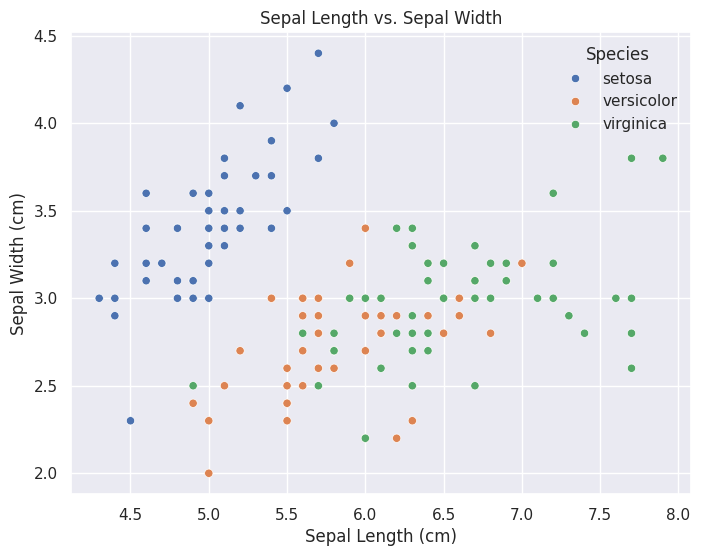

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='species', data=iris)
plt.title('Sepal Length vs. Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(title='Species')
plt.show()

# Explanation:
# The scatter plot shows the relationship between sepal length and sepal width.
# Different colors represent different species, allowing for visual differentiation.

# 9. Bubble Chart: Petal Length vs. Petal Width with Sepal Area

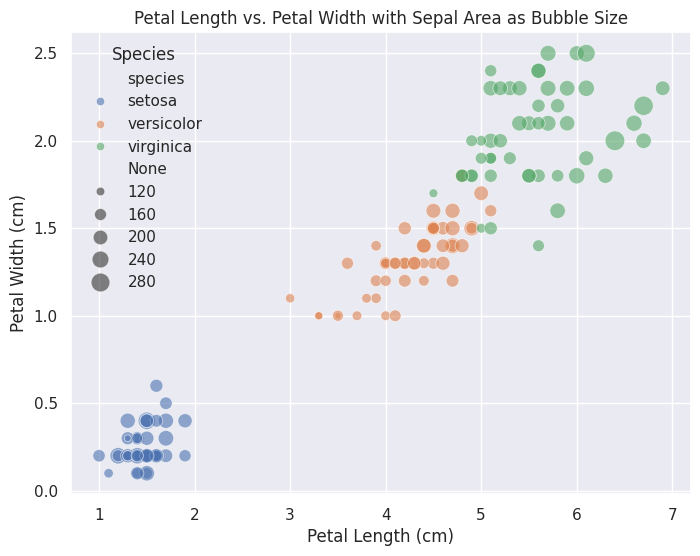

In [ ]:
plt.figure(figsize=(8, 6))
bubble_sizes = (iris['sepal length (cm)'] * iris['sepal width (cm)']) * 10  # Scale for better visualization
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', size=bubble_sizes, hue='species', data=iris, alpha=0.6, sizes=(20, 200))
plt.title('Petal Length vs. Petal Width with Sepal Area as Bubble Size')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend(title='Species')
plt.show()

# Explanation:
# The bubble chart visualizes the relationship between petal length and petal width

# 10. Chart with Error Bars: Sepal Length with Standard Deviation

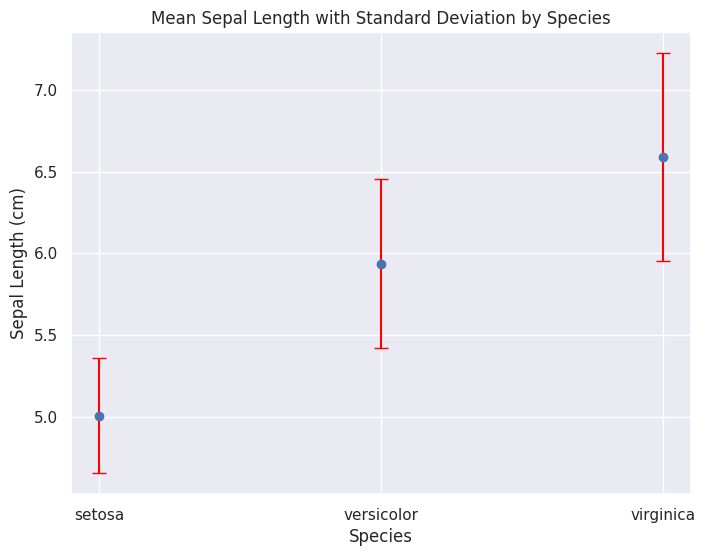

In [ ]:
species_stats = iris.groupby('species').agg({'sepal length (cm)': ['mean', 'std']})
species_stats.columns = ['mean_sepal_length', 'std_sepal_length']
species_stats = species_stats.reset_index()

plt.figure(figsize=(8, 6))
plt.errorbar(x=species_stats['species'], y=species_stats['mean_sepal_length'],
             yerr=species_stats['std_sepal_length'], fmt='o', ecolor='red', capsize=5)
plt.title('Mean Sepal Length with Standard Deviation by Species')
plt.xlabel('Species')
plt.ylabel('Sepal Length (cm)')
plt.grid(True)
plt.show()

# Explanation:
# The error bars in the plot above represent the standard deviation of sepal lengths for each species.
# They provide a visual representation of the variability in sepal length measurements within each species.

# 11. Interactive Scatter Plot: Sepal Length vs. Sepal Width

In [ ]:
import plotly.express as px

fig = px.scatter(iris, x='sepal length (cm)', y='sepal width (cm)',
                 color='species', title='Sepal Length vs. Sepal Width',
                 labels={'sepal length (cm)': 'Sepal Length (cm)',
                         'sepal width (cm)': 'Sepal Width (cm)'},
                 hover_data=['petal length (cm)', 'petal width (cm)'])
fig.show()

# Explanation:
# This interactive scatter plot allows users to hover over data points to see additional information,
# such as petal length and petal width. The different species are color-coded for clarity.

# 12. Interactive Line Chart: Average Measurements per Species

In [ ]:
species_means = iris.groupby('species').mean().reset_index()
fig = px.line(species_means, x='species', y=['sepal length (cm)', 'sepal width (cm)',
                                             'petal length (cm)', 'petal width (cm)'],
              title='Average Measurements per Species',
              labels={'value': 'Average Measurement (cm)', 'variable': 'Measurement Type'})
fig.show()

# Explanation:
# This interactive line chart displays the average measurements for each species.
# Users can hover over the lines to see exact values and toggle the visibility of different measurement types.

# 13. Interactive Box Plot: Sepal Length Distribution by Species

In [ ]:
fig = px.box(iris, x='species', y='sepal length (cm)', color='species',
             title='Sepal Length Distribution by Species',
             labels={'sepal length (cm)': 'Sepal Length (cm)'})
fig.show()

# Explanation:
# The interactive box plot allows users to explore the distribution of sepal lengths for each species.
# Hovering over the plot provides detailed statistics, and users can click on the legend to isolate specific species.